<a href="https://colab.research.google.com/github/raultyv/Machine_learning/blob/main/Perforacion_geologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## El Caso: Predicción de Zonas de Alta Ley (Copper Grade Prediction)

# 1. Simulación de Datos de Perforación

import pandas as pd
import numpy as np

np.random.seed(42)
n_muestras = 3000

data_geo = {
    'Coord_X': np.random.uniform(0, 1000, n_muestras),
    'Coord_Y': np.random.uniform(0, 1000, n_muestras),
    'Coord_Z': np.random.uniform(2000, 2500, n_muestras), # Profundidad (msnm)
    'Magnetismo': np.random.uniform(0, 100, n_muestras),  # Sensor geofísico
    'Alteracion_Tipo': np.random.randint(1, 4, n_muestras), # 1:Potásica, 2:Fílica, 3:Argílica
}

df_geo = pd.DataFrame(data_geo)

# Lógica Geológica: La ley de Cu es alta en la alteración potásica y a cierta profundidad
# Creamos la Ley de Cu con una "tendencia central" (el núcleo del pórfido)
distancia_al_centro = np.sqrt((df_geo['Coord_X']-500)**2 + (df_geo['Coord_Y']-500)**2)
df_geo['Ley_Cu_pct'] = (
    (1.2 / (1 + (distancia_al_centro/200)**2)) +
    (df_geo['Alteracion_Tipo'] == 1) * 0.3 +
    np.random.normal(0, 0.05, n_muestras)
)

print("✅ Muestreo Geológico completado.")
df_geo.head()

✅ Muestreo Geológico completado.


,Coord_X,Coord_Y,Coord_Z,Magnetismo,Alteracion_Tipo,Ley_Cu_pct
0,374.540119,672.702994,2324.128477,91.357801,2,0.537775
1,950.714306,796.681397,2086.193181,52.536048,3,0.150410
2,731.993942,250.467899,2436.197282,72.491027,3,0.289956
3,598.658484,624.874100,2306.558120,43.604830,1,1.046253
4,156.018640,571.745983,2078.601942,63.003458,1,0.550417


In [3]:
## Entrenamiento del Modelo de Estimación de Recursos

# Utilizaremos un Random Forest Regressor para "mapear" el yacimiento. La IA aprenderá dónde están las zonas ricas basándose en las coordenadas y los sensores.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df_geo.drop('Ley_Cu_pct', axis=1)
y = df_geo['Ley_Cu_pct']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_geo = RandomForestRegressor(n_estimators=200, random_state=42)
modelo_geo.fit(X_train, y_train)

print(f"Precisión de Estimación (R2): {modelo_geo.score(X_test, y_test):.4f}")

y_pred = modelo_geo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (%Cu): {rmse:.3f}")


Precisión de Estimación (R2): 0.9423
RMSE (%Cu): 0.060


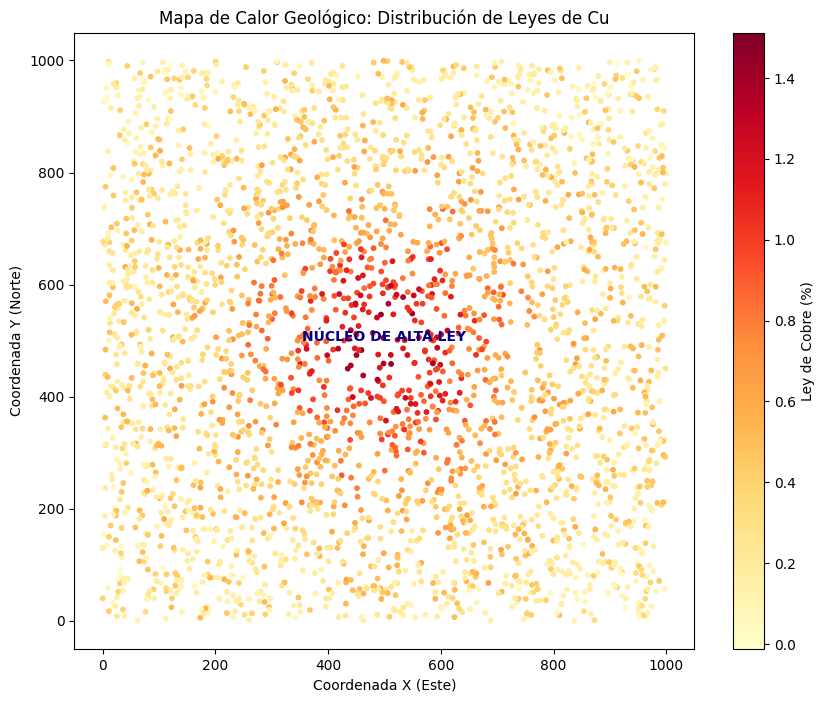

In [4]:
# 3. Visualización: El "Targeting" de Perforación
# Lo más importante en exploración es saber dónde perforar el siguiente pozo. Vamos a visualizar las zonas que el modelo identifica como "Alta Ley" ($> 0.8\% Cu$).

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# Graficamos todas las muestras, el color indica la ley predicha
scatter = plt.scatter(df_geo['Coord_X'], df_geo['Coord_Y'], c=df_geo['Ley_Cu_pct'], cmap='YlOrRd', s=10)
plt.colorbar(scatter, label='Ley de Cobre (%)')
plt.title('Mapa de Calor Geológico: Distribución de Leyes de Cu')
plt.xlabel('Coordenada X (Este)')
plt.ylabel('Coordenada Y (Norte)')

# Resaltamos el "Target" de exploración
plt.text(500, 500, 'NÚCLEO DE ALTA LEY', color='darkblue', fontweight='bold', ha='center')
plt.show()